In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn import metrics
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr 

In [2]:
df = pdr.get_data_yahoo('goog',start = '2010-01-01', end = '2020-01-01')
#df =df.drop(columns='Volume')

In [3]:
df.to_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/google.csv",header = True)

In [4]:
goog = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/google.csv", index_col = "Date",
                 parse_dates = True)

In [5]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,15.678981,15.547723,15.615220,15.610239,78541293.0,15.610239
2010-01-05,15.637387,15.480475,15.620949,15.541497,120638494.0,15.541497
2010-01-06,15.588072,15.102393,15.588072,15.149715,159744526.0,15.149715
2010-01-07,15.193053,14.760922,15.178109,14.797037,257533695.0,14.797037
2010-01-08,15.024933,14.672753,14.744733,14.994298,189680313.0,14.994298


<AxesSubplot:xlabel='Date'>

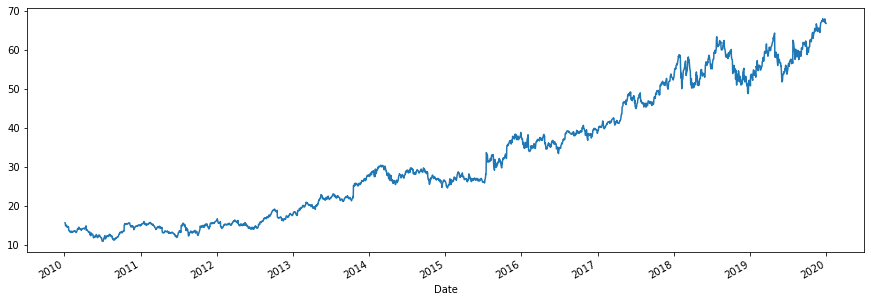

In [6]:
goog['Close'].plot(figsize=(15,5))

In [7]:
goog['LogClose'] = np.log(goog['Close'])

In [8]:
Ntest = 30 
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [9]:
# boolean series to index df row
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
hw = ExponentialSmoothing(
    train['Close'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal =None )
res_hw = hw.fit()


C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
goog.loc[train_idx,'HoltWintersTrain'] = res_hw.fittedvalues

In [13]:
goog.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest).to_numpy

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

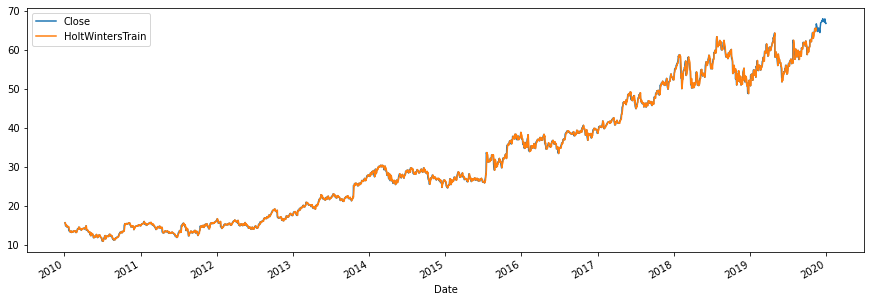

In [14]:
goog[['Close','HoltWintersTrain','HoltWintersTest']].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

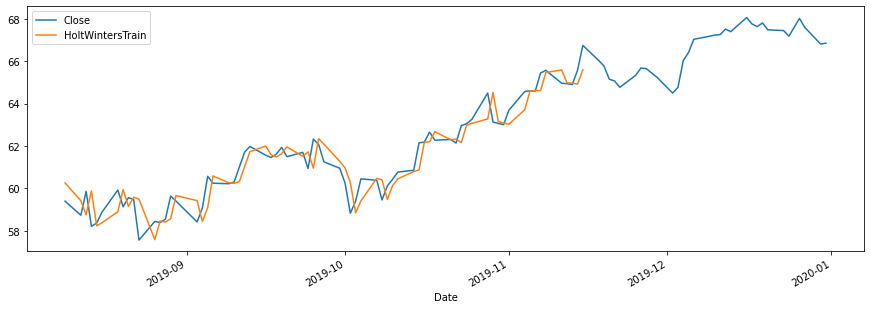

In [15]:
cols = ['Close','HoltWintersTrain','HoltWintersTest']
goog.iloc[-100:][cols].plot(figsize=(15,5))

In [16]:
Prediction = res_hw.forecast(Ntest)

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

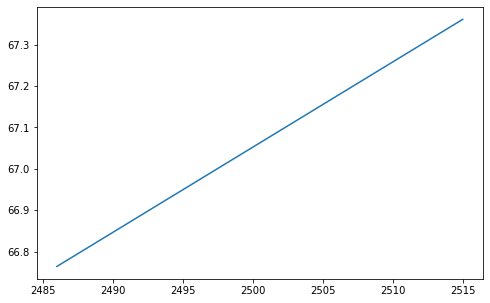

In [17]:
Prediction.plot(figsize=(8,5))

In [18]:
print('R2 Score is: ', metrics.explained_variance_score( test['Close'], Prediction))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error( test['Close'], Prediction)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(test['Close'], Prediction))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(test['Close'], Prediction))

R2 Score is:  0.23004463141817444
Root Mean Squared Error is:  1.0850539232214111
Mean Absolute Error is:  0.8436823046902698
Mean Absolute Percentage Error is:  0.01282834239724759
